# STUDENT ENGAGEMENT PREDICTION

In [1]:
# import libraries

import pandas as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
%matplotlib inline
import seaborn as sns #Visualization

In [2]:
# The First DataSet - Students Engagement

df = pd.read_csv('Student Engagement Level.csv')
pd.set_option('display.max_columns', None)
df = df.drop(['Unnamed: 0'], axis = 1)

In [3]:
df.head(10)

,Student ID,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours)
0,student000000,143,344,58,0,3,0,0,0,178.166667,92.716667,116.166667,129.016667
1,student000001,70,342,0,0,4,0,0,0,294.033333,196.083333,217.750000,235.955556
2,student000002,42,219,0,0,3,0,0,0,169.600000,235.733333,260.333333,221.888889
3,student000003,92,271,2,0,6,0,0,0,341.150000,245.900000,271.216667,286.088889
4,student000004,116,379,0,0,1,0,0,0,325.500000,236.283333,260.733333,274.172222
5,student000005,62,358,0,0,0,0,0,0,182.800000,89.883333,107.666667,126.783333
6,student000006,76,213,0,0,0,0,0,0,220.600000,200.483333,224.800000,215.294444
7,student000007,78,237,0,0,3,0,0,0,171.216667,91.333333,111.800000,124.783333
8,student000008,69,218,0,0,1,0,1,0,132.950000,296.000000,103.433333,177.461111
9,student000009,89,360,9,0,3,0,0,0,304.933333,213.050000,232.666667,250.216667


In [4]:
df.isnull().any()

Student ID                                      False
# Logins                                        False
# Content Reads                                 False
# Forum Reads                                   False
# Forum Posts                                   False
# Quiz Reviews before submission                False
Assignment 1 lateness indicator                 False
Assignment 2 lateness indicator                 False
Assignment 3 lateness indicator                 False
Assignment 1 duration to submit (in hours)      False
Assignment 2 duration to submit (in hours)      False
Assignment 3 duration to submit (in hours)      False
Average time to submit assignment (in hours)    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Student ID                                    486 non-null    object 
 1   # Logins                                      486 non-null    int64  
 2   # Content Reads                               486 non-null    int64  
 3   # Forum Reads                                 486 non-null    int64  
 4   # Forum Posts                                 486 non-null    int64  
 5   # Quiz Reviews before submission              486 non-null    int64  
 6   Assignment 1 lateness indicator               486 non-null    int64  
 7   Assignment 2 lateness indicator               486 non-null    int64  
 8   Assignment 3 lateness indicator               486 non-null    int64  
 9   Assignment 1 duration to submit (in hours)    486 non-null    flo

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
# Logins,486.0,79.897119,41.293639,0.000000,58.000000,74.000000,95.000000,647.000000
# Content Reads,486.0,271.843621,106.180726,34.000000,196.000000,252.500000,338.750000,1007.000000
# Forum Reads,486.0,2.156379,8.898293,0.000000,0.000000,0.000000,0.000000,58.000000
# Forum Posts,486.0,0.146091,0.606881,0.000000,0.000000,0.000000,0.000000,6.000000
# Quiz Reviews before submission,486.0,2.045267,1.964113,0.000000,1.000000,2.000000,3.000000,12.000000
Assignment 1 lateness indicator,486.0,0.024691,0.155343,0.000000,0.000000,0.000000,0.000000,1.000000
Assignment 2 lateness indicator,486.0,0.024691,0.155343,0.000000,0.000000,0.000000,0.000000,1.000000
Assignment 3 lateness indicator,486.0,0.014403,0.119269,0.000000,0.000000,0.000000,0.000000,1.000000
Assignment 1 duration to submit (in hours),486.0,227.659499,96.342083,50.883333,147.066667,191.033333,306.045833,558.000000
Assignment 2 duration to submit (in hours),486.0,136.916324,82.754479,6.200000,58.708333,102.791667,212.112500,296.250000


---------
Plotting data

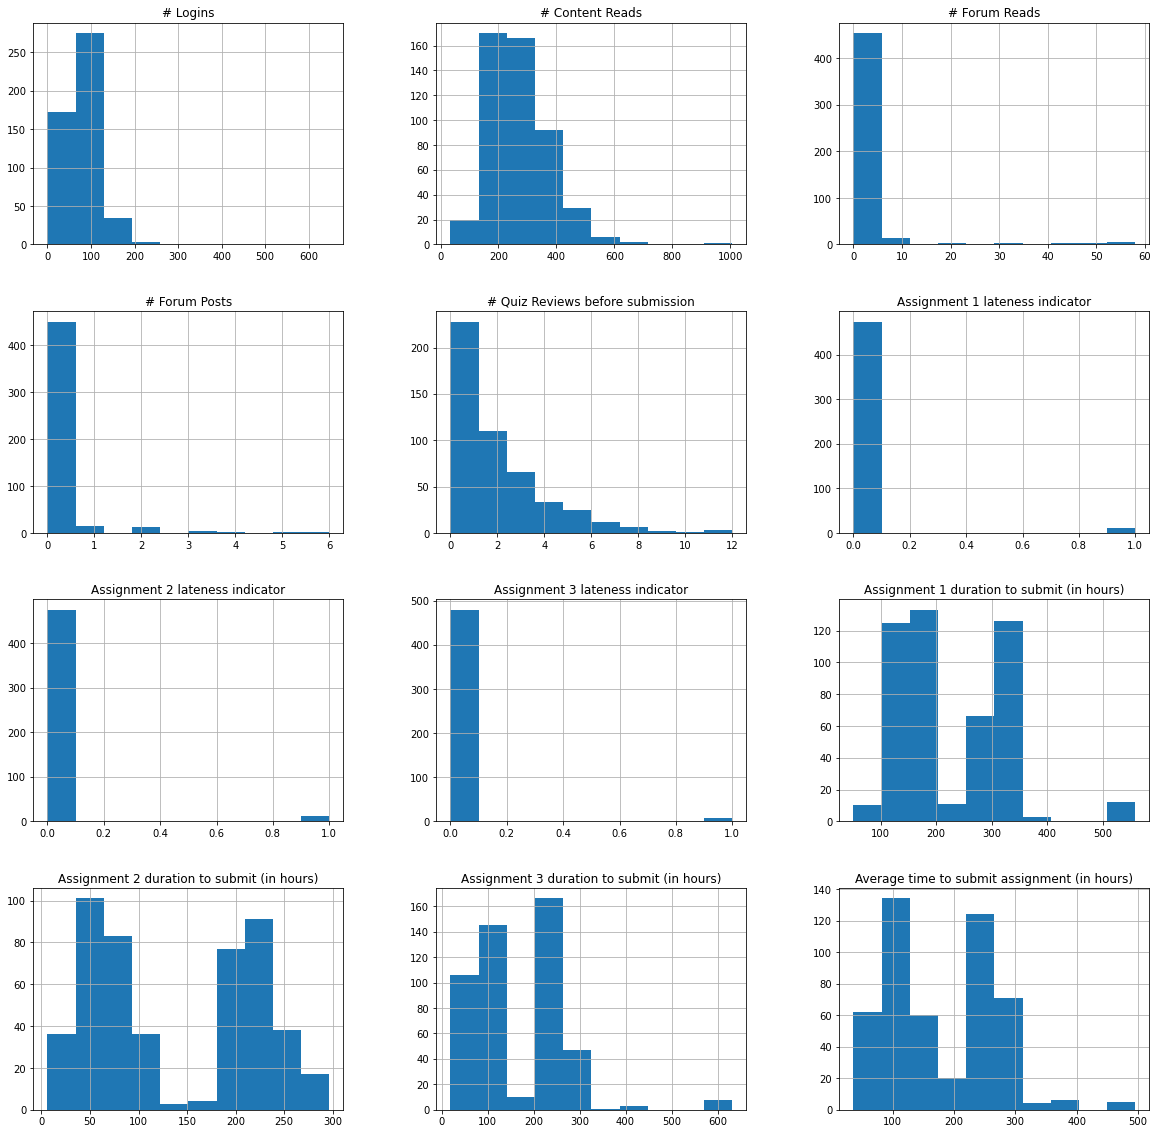

In [7]:
p = df.hist(figsize = (20,20))

<AxesSubplot:>

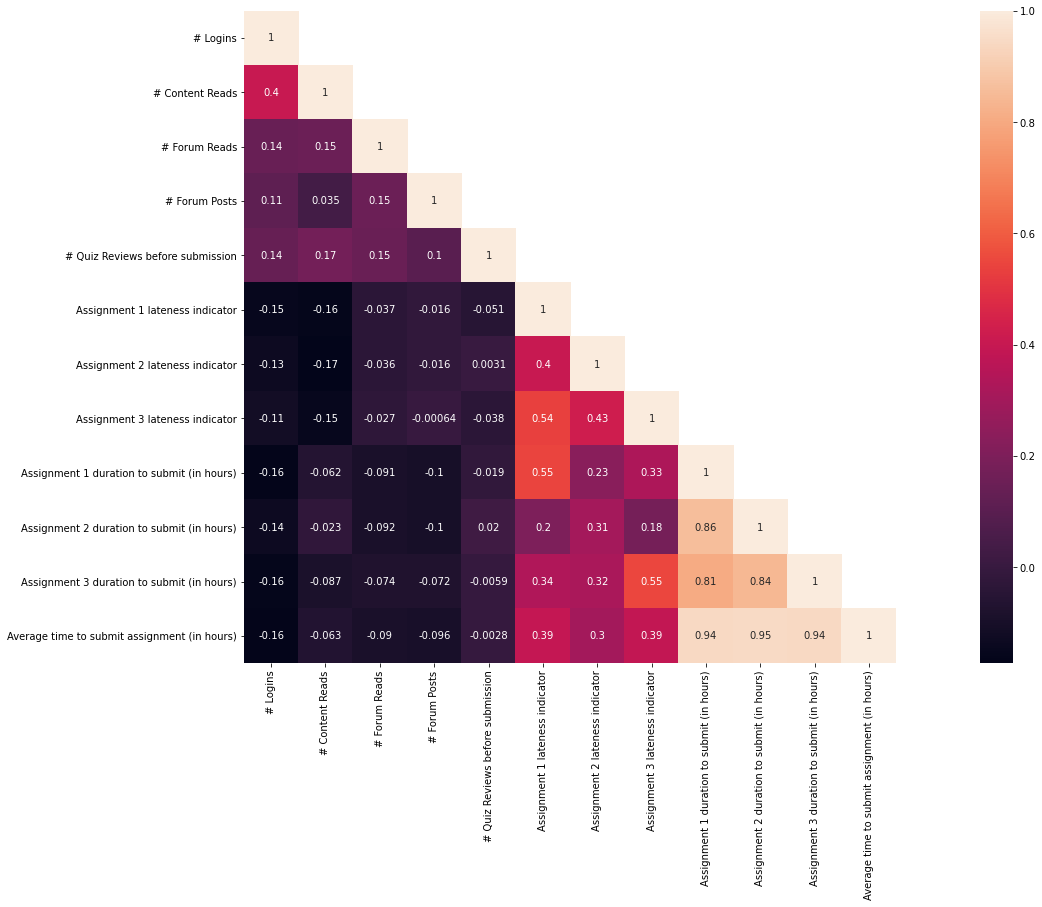

In [8]:
# Correlation Plot
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

-----------------------
Predict with K-Means

In [9]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Student ID"],axis = 1),),
        columns=['# Logins', '# Content Reads', '# Forum Reads', '# Forum Posts', '# Quiz Reviews before submission',
       'Assignment 1 lateness indicator', 'Assignment 2 lateness indicator', 'Assignment 3 lateness indicator', 'Assignment 1 duration to submit (in hours)', 
        'Assignment 2 duration to submit (in hours)', 'Assignment 3 duration to submit (in hours)', 'Average time to submit assignment (in hours)'])


In [10]:
X.head(10)

,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours)
0,1.529725,0.680262,6.282234,-0.240972,0.486589,-0.159111,-0.159111,-0.120887,-0.514249,-0.534656,-0.514135,-0.551307
1,-0.239924,0.661407,-0.242586,-0.240972,0.996249,-0.159111,-0.159111,-0.120887,0.689649,0.715707,0.483445,0.659733
2,-0.918693,-0.498189,-0.242586,-0.240972,0.486589,-0.159111,-0.159111,-0.120887,-0.603260,1.195329,0.901626,0.500434
3,0.293395,-0.007953,-0.017592,-0.240972,2.015570,-0.159111,-0.159111,-0.120887,1.179209,1.318309,1.008504,1.227474
4,0.875197,1.010228,-0.242586,-0.240972,-0.532731,-0.159111,-0.159111,-0.120887,1.016600,1.201982,0.905554,1.092522
5,-0.433858,0.812249,-0.242586,-0.240972,-1.042392,-0.159111,-0.159111,-0.120887,-0.466107,-0.568929,-0.597608,-0.576599
6,-0.094473,-0.554755,-0.242586,-0.240972,-1.042392,-0.159111,-0.159111,-0.120887,-0.073351,0.768931,0.552678,0.425754
7,-0.045990,-0.328492,-0.242586,-0.240972,0.486589,-0.159111,-0.159111,-0.120887,-0.586462,-0.551390,-0.557017,-0.599248
8,-0.264165,-0.507617,-0.242586,-0.240972,-0.532731,-0.159111,6.284903,-0.120887,-0.984067,1.924338,-0.639181,-0.002693
9,0.220670,0.831104,0.769886,-0.240972,0.486589,-0.159111,-0.159111,-0.120887,0.802904,0.920943,0.629931,0.821235


In [11]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)


/Users/a_dawish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


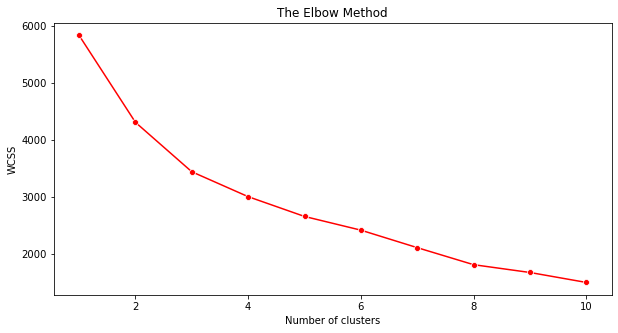

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [14]:
Result = kmeans.labels_
Result

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,

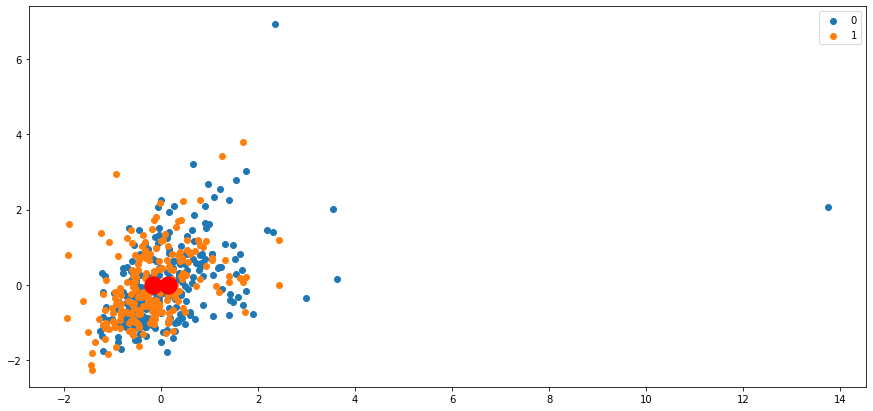

In [15]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(kmeans.labels_)
plt.figure(figsize=(15,7))

#plotting the results:
 
for i in u_labels:
    plt.scatter(X.iloc[y_kmeans == i , 0] , X.iloc[y_kmeans == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 300, color = 'red')
plt.legend()
plt.show()

-------
Add preduction result to each student to see who has high or low engagement 

In [16]:
Engagement_Level = pd.DataFrame(Result)

In [17]:
df['Engagement_Level'] = Engagement_Level

In [18]:
df.head(10)

,Student ID,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Engagement_Level
0,student000000,143,344,58,0,3,0,0,0,178.166667,92.716667,116.166667,129.016667,0
1,student000001,70,342,0,0,4,0,0,0,294.033333,196.083333,217.750000,235.955556,1
2,student000002,42,219,0,0,3,0,0,0,169.600000,235.733333,260.333333,221.888889,1
3,student000003,92,271,2,0,6,0,0,0,341.150000,245.900000,271.216667,286.088889,1
4,student000004,116,379,0,0,1,0,0,0,325.500000,236.283333,260.733333,274.172222,1
5,student000005,62,358,0,0,0,0,0,0,182.800000,89.883333,107.666667,126.783333,0
6,student000006,76,213,0,0,0,0,0,0,220.600000,200.483333,224.800000,215.294444,1
7,student000007,78,237,0,0,3,0,0,0,171.216667,91.333333,111.800000,124.783333,0
8,student000008,69,218,0,0,1,0,1,0,132.950000,296.000000,103.433333,177.461111,1
9,student000009,89,360,9,0,3,0,0,0,304.933333,213.050000,232.666667,250.216667,1


In [19]:
df.loc[df['Engagement_Level'] == 0, 'Engagement_Level'] = 'H'
df.loc[df['Engagement_Level'] == 1, 'Engagement_Level'] = 'L'

In [20]:
df.head(10)

,Student ID,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Engagement_Level
0,student000000,143,344,58,0,3,0,0,0,178.166667,92.716667,116.166667,129.016667,H
1,student000001,70,342,0,0,4,0,0,0,294.033333,196.083333,217.750000,235.955556,L
2,student000002,42,219,0,0,3,0,0,0,169.600000,235.733333,260.333333,221.888889,L
3,student000003,92,271,2,0,6,0,0,0,341.150000,245.900000,271.216667,286.088889,L
4,student000004,116,379,0,0,1,0,0,0,325.500000,236.283333,260.733333,274.172222,L
5,student000005,62,358,0,0,0,0,0,0,182.800000,89.883333,107.666667,126.783333,H
6,student000006,76,213,0,0,0,0,0,0,220.600000,200.483333,224.800000,215.294444,L
7,student000007,78,237,0,0,3,0,0,0,171.216667,91.333333,111.800000,124.783333,H
8,student000008,69,218,0,0,1,0,1,0,132.950000,296.000000,103.433333,177.461111,L
9,student000009,89,360,9,0,3,0,0,0,304.933333,213.050000,232.666667,250.216667,L


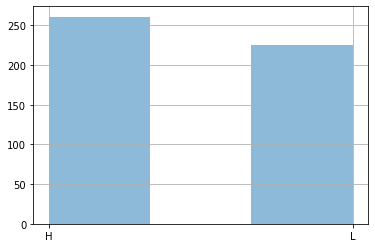

In [21]:
p = df['Engagement_Level'].hist(bins=3, alpha=0.5)

# STUDENT PERFOMANCE PREDICTION

In [22]:
df2 = pd.read_csv('Student Performance Prediction.csv')
pd.set_option('display.max_columns', None)
df2 = df2.drop(['Unnamed: 0'], axis = 1)
df2.head(10)

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100]
0,student000000,95,91,70,90,84,64,85,85
1,student000001,85,76,65,61,73,64,76,76
2,student000002,85,41,73,61,73,61,73,73
3,student000003,80,78,80,79,79,57,80,79
4,student000004,85,91,78,80,84,67,85,85
5,student000005,80,79,83,87,82,60,83,83
6,student000006,70,91,80,81,79,73,85,85
7,student000007,75,65,63,71,78,31,64,64
8,student000008,80,87,85,88,89,59,85,85
9,student000009,70,68,85,91,82,71,86,86


----------------
Predict with K-Means

In [23]:
#Scaling the data

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df2.drop(["Student ID"],axis = 1),),
        columns=['Quiz01 [10]', 'Assignment01 [8]', 'Midterm Exam [20]', 'Assignment02 [12]', 'Assignment03 [25]',
       'Final Exam [35]', 'Course Grade', 'Total [100]'])


In [24]:
X.head(10)

,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100]
0,1.250886,0.876114,-0.593656,0.848473,0.241239,0.121886,0.410227,0.400356
1,0.519321,0.029386,-1.011191,-1.063950,-0.606667,0.121886,-0.389387,-0.398165
2,0.519321,-1.946314,-0.343135,-1.063950,-0.606667,-0.079143,-0.655925,-0.664339
3,0.153538,0.142283,0.241414,0.123071,-0.144173,-0.347181,-0.034003,-0.131991
4,0.519321,0.876114,0.074400,0.189017,0.241239,0.322914,0.410227,0.400356
5,0.153538,0.198731,0.491935,0.650636,0.087075,-0.146152,0.232535,0.222907
6,-0.578027,0.876114,0.241414,0.254963,-0.144173,0.724971,0.410227,0.400356
7,-0.212244,-0.591548,-1.178205,-0.404494,-0.221255,-2.089427,-1.455538,-1.462860
8,0.153538,0.650320,0.658949,0.716582,0.626651,-0.213162,0.410227,0.400356
9,-0.578027,-0.422203,0.658949,0.914419,0.087075,0.590952,0.499073,0.489080


In [25]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)


/Users/a_dawish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


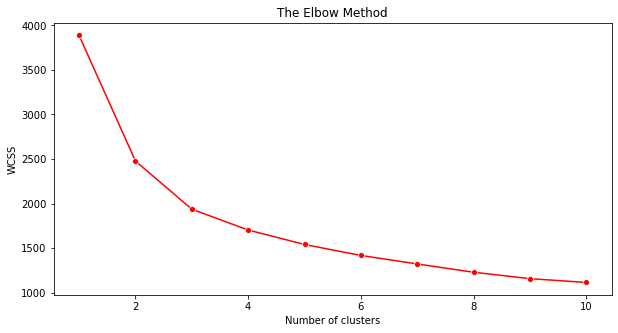

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [28]:
Result = kmeans.labels_
Result

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

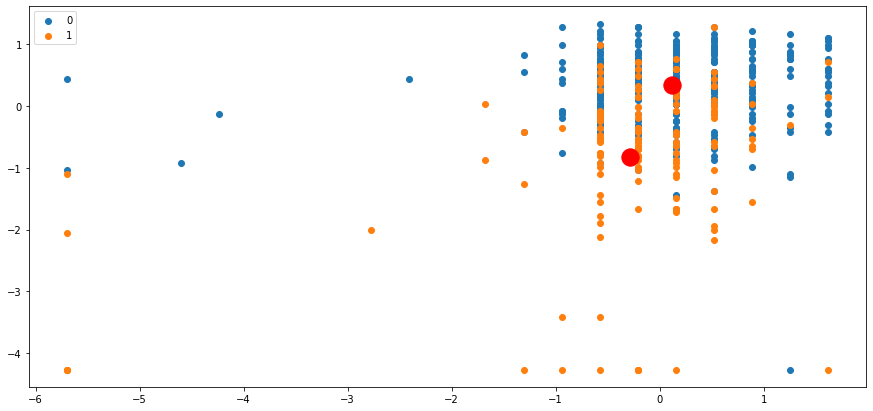

In [29]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(kmeans.labels_)
plt.figure(figsize=(15,7))

#plotting the results:
 
for i in u_labels:
    plt.scatter(X.iloc[y_kmeans == i , 0] , X.iloc[y_kmeans == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 300, color = 'red')
plt.legend()
plt.show()

In [30]:
Performance = pd.DataFrame(Result)

In [31]:
df2['Performance'] = Performance

In [32]:
df2.head()

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Performance
0,student000000,95,91,70,90,84,64,85,85,0
1,student000001,85,76,65,61,73,64,76,76,1
2,student000002,85,41,73,61,73,61,73,73,1
3,student000003,80,78,80,79,79,57,80,79,0
4,student000004,85,91,78,80,84,67,85,85,0


In [33]:
df2.loc[df2['Performance'] == 0, 'Performance'] = 'G'
df2.loc[df2['Performance'] == 1, 'Performance'] = 'W'

In [34]:
df2.head(10)

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Performance
0,student000000,95,91,70,90,84,64,85,85,G
1,student000001,85,76,65,61,73,64,76,76,W
2,student000002,85,41,73,61,73,61,73,73,W
3,student000003,80,78,80,79,79,57,80,79,G
4,student000004,85,91,78,80,84,67,85,85,G
5,student000005,80,79,83,87,82,60,83,83,G
6,student000006,70,91,80,81,79,73,85,85,G
7,student000007,75,65,63,71,78,31,64,64,W
8,student000008,80,87,85,88,89,59,85,85,G
9,student000009,70,68,85,91,82,71,86,86,G


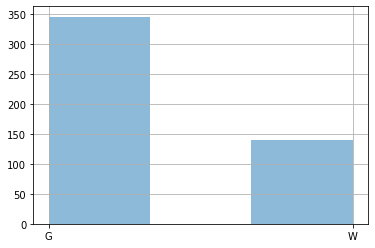

In [35]:
p = df2['Performance'].hist(bins=3, alpha=0.5)

# STUDENT PERFOMANCE AND ENGAGEMENT

Now let's merge above two dataframes together in order to observe the correlation between perfomance and engagement

In [36]:
df.head(10)

,Student ID,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Engagement_Level
0,student000000,143,344,58,0,3,0,0,0,178.166667,92.716667,116.166667,129.016667,H
1,student000001,70,342,0,0,4,0,0,0,294.033333,196.083333,217.750000,235.955556,L
2,student000002,42,219,0,0,3,0,0,0,169.600000,235.733333,260.333333,221.888889,L
3,student000003,92,271,2,0,6,0,0,0,341.150000,245.900000,271.216667,286.088889,L
4,student000004,116,379,0,0,1,0,0,0,325.500000,236.283333,260.733333,274.172222,L
5,student000005,62,358,0,0,0,0,0,0,182.800000,89.883333,107.666667,126.783333,H
6,student000006,76,213,0,0,0,0,0,0,220.600000,200.483333,224.800000,215.294444,L
7,student000007,78,237,0,0,3,0,0,0,171.216667,91.333333,111.800000,124.783333,H
8,student000008,69,218,0,0,1,0,1,0,132.950000,296.000000,103.433333,177.461111,L
9,student000009,89,360,9,0,3,0,0,0,304.933333,213.050000,232.666667,250.216667,L


In [37]:
df2.head(10)

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Performance
0,student000000,95,91,70,90,84,64,85,85,G
1,student000001,85,76,65,61,73,64,76,76,W
2,student000002,85,41,73,61,73,61,73,73,W
3,student000003,80,78,80,79,79,57,80,79,G
4,student000004,85,91,78,80,84,67,85,85,G
5,student000005,80,79,83,87,82,60,83,83,G
6,student000006,70,91,80,81,79,73,85,85,G
7,student000007,75,65,63,71,78,31,64,64,W
8,student000008,80,87,85,88,89,59,85,85,G
9,student000009,70,68,85,91,82,71,86,86,G


----
Merge two dataframes 

In [38]:
df_merge_col = pd.merge(df, df2, on='Student ID')
df_merge_col['Engagement Level'] = df_merge_col['Engagement_Level']
df_merge_col = df_merge_col.drop('Engagement_Level',axis = 1)
df_merge_col.head(10)

,Student ID,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Performance,Engagement Level
0,student000000,143,344,58,0,3,0,0,0,178.166667,92.716667,116.166667,129.016667,95,91,70,90,84,64,85,85,G,H
1,student000001,70,342,0,0,4,0,0,0,294.033333,196.083333,217.750000,235.955556,85,76,65,61,73,64,76,76,W,L
2,student000002,42,219,0,0,3,0,0,0,169.600000,235.733333,260.333333,221.888889,85,41,73,61,73,61,73,73,W,L
3,student000003,92,271,2,0,6,0,0,0,341.150000,245.900000,271.216667,286.088889,80,78,80,79,79,57,80,79,G,L
4,student000004,116,379,0,0,1,0,0,0,325.500000,236.283333,260.733333,274.172222,85,91,78,80,84,67,85,85,G,L
5,student000005,62,358,0,0,0,0,0,0,182.800000,89.883333,107.666667,126.783333,80,79,83,87,82,60,83,83,G,H
6,student000006,76,213,0,0,0,0,0,0,220.600000,200.483333,224.800000,215.294444,70,91,80,81,79,73,85,85,G,L
7,student000007,78,237,0,0,3,0,0,0,171.216667,91.333333,111.800000,124.783333,75,65,63,71,78,31,64,64,W,H
8,student000008,69,218,0,0,1,0,1,0,132.950000,296.000000,103.433333,177.461111,80,87,85,88,89,59,85,85,G,L
9,student000009,89,360,9,0,3,0,0,0,304.933333,213.050000,232.666667,250.216667,70,68,85,91,82,71,86,86,G,L


In [50]:
df_merge_col.groupby(['Engagement Level', 'Performance']).size()

Engagement Level  Performance
H                 G              202
                  W               59
L                 G              144
                  W               81
dtype: int64

In [47]:
df_merge_col['Performance_Engagement'] = df_merge_col['Engagement Level'] + df_merge_col['Performance']

In [48]:
df_merge_col.head(10)

,Student ID,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Performance,Engagement Level,Performance_Engagement
0,student000000,143,344,58,0,3,0,0,0,178.166667,92.716667,116.166667,129.016667,95,91,70,90,84,64,85,85,G,H,HG
1,student000001,70,342,0,0,4,0,0,0,294.033333,196.083333,217.750000,235.955556,85,76,65,61,73,64,76,76,W,L,LW
2,student000002,42,219,0,0,3,0,0,0,169.600000,235.733333,260.333333,221.888889,85,41,73,61,73,61,73,73,W,L,LW
3,student000003,92,271,2,0,6,0,0,0,341.150000,245.900000,271.216667,286.088889,80,78,80,79,79,57,80,79,G,L,LG
4,student000004,116,379,0,0,1,0,0,0,325.500000,236.283333,260.733333,274.172222,85,91,78,80,84,67,85,85,G,L,LG
5,student000005,62,358,0,0,0,0,0,0,182.800000,89.883333,107.666667,126.783333,80,79,83,87,82,60,83,83,G,H,HG
6,student000006,76,213,0,0,0,0,0,0,220.600000,200.483333,224.800000,215.294444,70,91,80,81,79,73,85,85,G,L,LG
7,student000007,78,237,0,0,3,0,0,0,171.216667,91.333333,111.800000,124.783333,75,65,63,71,78,31,64,64,W,H,HW
8,student000008,69,218,0,0,1,0,1,0,132.950000,296.000000,103.433333,177.461111,80,87,85,88,89,59,85,85,G,L,LG
9,student000009,89,360,9,0,3,0,0,0,304.933333,213.050000,232.666667,250.216667,70,68,85,91,82,71,86,86,G,L,LG


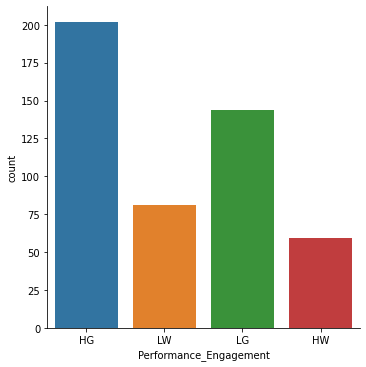

In [49]:
import seaborn as sns

sns.catplot(data=df_merge_col,kind='count',x='Performance_Engagement')

-----------------------
Train Test Split

In [51]:
# X variables and Scaling X data

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_merge_col.drop(["Student ID", "Engagement Level", "Performance", "Performance_Engagement"],axis = 1),),
        columns=['# Logins', '# Content Reads', '# Forum Reads', '# Forum Posts', '# Quiz Reviews before submission',
       'Assignment 1 lateness indicator', 'Assignment 2 lateness indicator', 'Assignment 3 lateness indicator', 'Assignment 1 duration to submit (in hours)', 
        'Assignment 2 duration to submit (in hours)', 'Assignment 3 duration to submit (in hours)', 'Average time to submit assignment (in hours)', 'Quiz01 [10]', 'Assignment01 [8]', 'Midterm Exam [20]', 'Assignment02 [12]', 'Assignment03 [25]',
       'Final Exam [35]', 'Course Grade', 'Total [100]'])
   

In [52]:
# check X variable
X.head()

,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100]
0,1.529725,0.680262,6.282234,-0.240972,0.486589,-0.159111,-0.159111,-0.120887,-0.514249,-0.534656,-0.514135,-0.551307,1.250886,0.876114,-0.593656,0.848473,0.241239,0.121886,0.410227,0.400356
1,-0.239924,0.661407,-0.242586,-0.240972,0.996249,-0.159111,-0.159111,-0.120887,0.689649,0.715707,0.483445,0.659733,0.519321,0.029386,-1.011191,-1.063950,-0.606667,0.121886,-0.389387,-0.398165
2,-0.918693,-0.498189,-0.242586,-0.240972,0.486589,-0.159111,-0.159111,-0.120887,-0.603260,1.195329,0.901626,0.500434,0.519321,-1.946314,-0.343135,-1.063950,-0.606667,-0.079143,-0.655925,-0.664339
3,0.293395,-0.007953,-0.017592,-0.240972,2.015570,-0.159111,-0.159111,-0.120887,1.179209,1.318309,1.008504,1.227474,0.153538,0.142283,0.241414,0.123071,-0.144173,-0.347181,-0.034003,-0.131991
4,0.875197,1.010228,-0.242586,-0.240972,-0.532731,-0.159111,-0.159111,-0.120887,1.016600,1.201982,0.905554,1.092522,0.519321,0.876114,0.074400,0.189017,0.241239,0.322914,0.410227,0.400356


In [54]:
# check y variable
y = df_merge_col['Performance_Engagement']
y.head()

0    HG
1    LW
2    LW
3    LG
4    LG
Name: Performance_Engagement, dtype: object

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [56]:
#Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
#show first 5 model predictions on the test data
classifier.predict(X_test)[0:5]

array(['LW', 'LW', 'HW', 'HG', 'HG'], dtype=object)

In [59]:
#Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  0  0  0]
 [ 2 10  0  0]
 [ 0  0 28  1]
 [ 0  0  1 15]]
              precision    recall  f1-score   support

          HG       0.95      1.00      0.98        41
          HW       1.00      0.83      0.91        12
          LG       0.97      0.97      0.97        29
          LW       0.94      0.94      0.94        16

    accuracy                           0.96        98
   macro avg       0.96      0.93      0.95        98
weighted avg       0.96      0.96      0.96        98



In [60]:
#Comparing Error Rate with the K Value

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

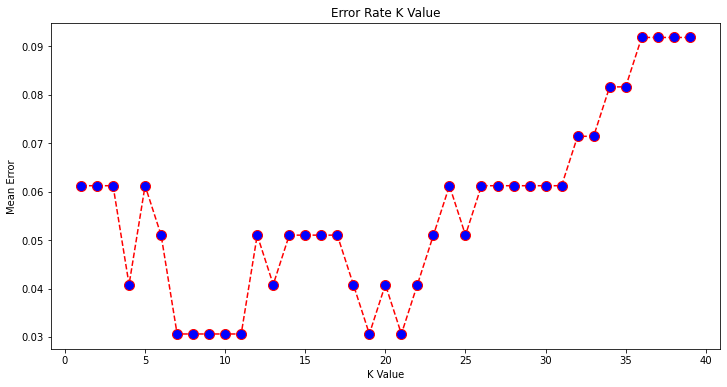

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [62]:
import sklearn.metrics as metrics

print("Accuracy of model",metrics.accuracy_score(y_test, y_pred))

Accuracy of model 0.9591836734693877
